# Overview
Based off of https://gist.github.com/GJMcClintock/29330e26f674d4103c4f7080212a9208

In [15]:
#packages
import pandas as pd
import cfbd
import webcolors as wc
import numpy as np
import yaml
import matplotlib.pyplot as plt

In [ ]:

with open("/home/mholswade/Documents/projects/CFB_Analytics/notebooks/api.yml", "r") as stream:
    try:
        config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [ ]:

configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = config['api']
configuration.api_key_prefix['Authorization'] = 'Bearer'


In [ ]:
#Pull all game data for 2019 season, move into dataframe
api_instance = cfbd.GamesApi(cfbd.ApiClient(configuration))
games = api_instance.get_games(year=2021)

games_df = pd.DataFrame.from_records([g.to_dict() for g in games])
games_df.head()

games_df.columns

In [29]:
teams_api = cfbd.TeamsApi(cfbd.ApiClient(configuration))
teams = teams_api.get_fbs_teams()
teams_df = pd.DataFrame.from_records([dict(team=t.school, color=t.color, alt_color=t.alt_color,location=t.location) for t in teams])
teams_df.head()

teams_df.to_csv('/home/mholswade/Documents/projects/CFB_Analytics/data/team_colors_mod.csv')

In [28]:
type(teams_df.loc[1]['location'])

dict

In [30]:
# #Functions from https://stackoverflow.com/questions/44354437/classify-users-by-colors
# def get_approx_color(hex_color):
#     orig = wc.hex_to_rgb(hex_color)
#     similarity = {}
#     for hex_code, color_name in wc.hex_to_name.items():
#         approx = wc.hex_to_rgb(hex_code)
#         similarity[color_name] = sum(np.subtract(orig, approx) ** 2)
#     return min(similarity, key=similarity.get)

# def get_color_name(hex_color):
#     try:
#         return wc.hex_to_name(hex_color)
#     except ValueError:
#         return get_approx_color(hex_color)

# print(get_color_name(u"#F5ABB5"))
# # lightpink

# for i in range(0,len(teams_df)):
#     teams_df.loc[i]['color_name'] = get_color_name(teams_df.loc[i]['color'])

AttributeError: 'function' object has no attribute 'items'

<bound method Series.unique of 0       Blue
1       Blue
2        Red
3      Black
4       Blue
       ...  
125      Red
126    Brown
127     Blue
128      Red
129      Red
Name: color_name, Length: 130, dtype: object>

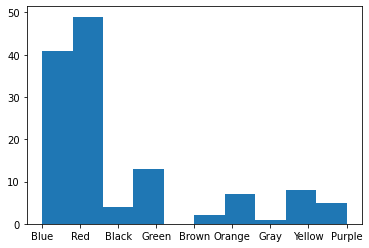

In [21]:
teams_df = pd.read_csv('/home/mholswade/Documents/projects/CFB_Analytics/data/team_colors.csv')
plt.hist(teams_df['color_name'])
teams_df['color_name'].unique

In [53]:
teams_df.head()

,team,color,alt_color,location,venue_id,name,city,state,zip,country_code,timezone,latitude,longitude,elevation,capacity,year_constructed,grass,dome
0,Air Force,#004a7b,#ffffff,"{'venue_id': 3713, 'name': 'Falcon Stadium', '...",3713,Falcon Stadium,Colorado Springs,CO,80840,US,America/Denver,38.99697,-104.843616,2024.875732,46692,1962,False,False
1,Akron,#00285e,#84754e,"{'venue_id': 3768, 'name': 'Summa Field at Inf...",3768,Summa Field at InfoCision Stadium,Akron,OH,44399,US,America/New_York,41.072553,-81.508341,321.2875061,30000,2009,False,False
2,Alabama,#690014,#f1f2f3,"{'venue_id': 3657, 'name': 'Bryant Denny Stadi...",3657,Bryant Denny Stadium,Tuscaloosa,AL,35487,US,America/Chicago,33.208275,-87.550384,70.05136108,101821,1929,True,False
3,Appalachian State,#000000,#ffcd00,"{'venue_id': 3792, 'name': 'Kidd Brewer Stadiu...",3792,Kidd Brewer Stadium,Boone,NC,28608,US,America/New_York,36.211427,-81.685428,991.3414307,30000,1962,False,False
4,Arizona,#002449,#00205b,"{'venue_id': 3619, 'name': 'Arizona Stadium', ...",3619,Arizona Stadium,Tucson,AZ,85721,US,America/Phoenix,32.228805,-110.948868,742.1530151,50782,1928,False,False


In [48]:
type(teams_df.loc[1]['location'])
teams_df.loc[1]['venue_id'] = teams_df.loc[1]['location']['venue_id']


,team,color,alt_color,location
0,Air Force,#004a7b,#ffffff,"{'venue_id': 3713, 'name': 'Falcon Stadium', '..."
1,Akron,#00285e,#84754e,"{'venue_id': 3768, 'name': 'Summa Field at Inf..."
2,Alabama,#690014,#f1f2f3,"{'venue_id': 3657, 'name': 'Bryant Denny Stadi..."
3,Appalachian State,#000000,#ffcd00,"{'venue_id': 3792, 'name': 'Kidd Brewer Stadiu..."
4,Arizona,#002449,#00205b,"{'venue_id': 3619, 'name': 'Arizona Stadium', ..."


In [51]:
for key in teams_df.loc[i]['location'].keys():
 teams_df[key] = ''


for i in range(0,len(teams_df)):
    for key in teams_df.loc[i]['location'].keys():
        print(key)
        teams_df.loc[i][key] = teams_df.loc[i]['location'][key]



venue_id
name
city
state
zip
country_code
timezone
latitude
longitude
elevation
capacity
year_constructed
grass
dome
venue_id
name
city
state
zip
country_code
timezone
latitude
longitude
elevation
capacity
year_constructed
grass
dome
venue_id
name
city
state
zip
country_code
timezone
latitude
longitude
elevation
capacity
year_constructed
grass
dome
venue_id
name
city
state
zip
country_code
timezone
latitude
longitude
elevation
capacity
year_constructed
grass
dome
venue_id
name
city
state
zip
country_code
timezone
latitude
longitude
elevation
capacity
year_constructed
grass
dome
venue_id
name
city
state
zip
country_code
timezone
latitude
longitude
elevation
capacity
year_constructed
grass
dome
venue_id
name
city
state
zip
country_code
timezone
latitude
longitude
elevation
capacity
year_constructed
grass
dome
venue_id
name
city
state
zip
country_code
timezone
latitude
longitude
elevation
capacity
year_constructed
grass
dome
venue_id
name
city
state
zip
country_code
timezone
latitude
long